# <center>Getting Started with PySpark</center>

## Introduction

Apache Spark is a fast and powerful framework that provides an API to perform massive distributed processing over resilient sets of data. The main abstraction Spark provides is a resilient distributed dataset (RDD), which is the fundamental and backbone data type of this engine. Spark SQL is Apache Spark's module for working with structured data and MLlib is Apache Spark's scalable machine learning library. Apache Spark is written in Scala programming language. To support Python with Spark, Apache Spark community released a tool, PySpark. PySpark has similar computation speed and power as Scala. PySpark is a parallel and distributed engine for running big data applications. Using PySpark, you can work with RDDs in Python programming language. 

Apache Spark 是一个快速而强大的框架，它提供 API 来对弹性数据集执行大规模分布式处理。Spark 提供的主要抽象是弹性分布式数据集 (RDD)，RDD 是该引擎的基础和骨干数据类型。Spark SQL 是 Apache Spark 的一个模块，用于处理结构化数据，MLlib 是 Apache Spark 的可扩展机器学习库。Apache Spark 是用 Scala 编程语言编写的。为了支持 Spark 使用 Python，Apache Spark 社区发布了一个名为 PySPark 的工具。PySPark 的计算速度和能力与 Scala 相似。PySpark 是一个并行的分布式引擎，用于运行大数据应用程序。利用 PySPark，您可以使用 Python 编程语言来处理 RDDs。

This tutorial discusses Big Data via PySpark, a Python package for spark programming. Spark's high level libraries such as SparkSQL, Mllib will be used to interact with two different datasets.

## What is SparkContext?

Spark comes with interactive python shell in which PySpark is already installed in it. PySpark automatically creates a SparkContext for you in the PySpark Shell. SparkContext is an entry point into the world of Spark. An entry point is a way of connecting to Spark cluster. We can use SparkContext using **sc** variable. In the following examples, we retrieve SparkContext version and Python version of SparkContext. 

Spark 附带了一个已经安装了 PySpark 的交互式 Python shell。PySpark 将在 PySpark Shell 中自动为您创建一个 SparkContext。SparkContext 是进入 Spark 世界的入口点。入口点是连接到 Spark 集群的一种方法。我们可以通过 sc.variable 来使用 SparkContext。  
在下面的示例中，我们检索 SparkContext 版本和 Python 版本的 SparkContext。

In [3]:
# PySpark现在在pypi中可用。要安装只需运行pip install pyspark。
! pip install pyspark
# java运行环境
sudo apt install default-jre
# java开发工具
sudo apt install default-jdk

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [7]:
# 任何PySpark程序的前两行如下所示
from pyspark import SparkContext
sc = SparkContext("local", "First App")
# to retrieve SparkContext version
sc.version

'3.1.1'

In [8]:
# to retriece Python version of SparkContext
sc.pythonVer

'3.8'

## Import Packages

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from math import sqrt
from pyspark.mllib.clustering import KMeans

## Using map and filter methods with Lambda function in Python

Lambda functions are anonymous functions in Python. Anonymous functions do not bind to any name in runtime and it returns the functions without any name. They are usually used with map and filter methods. Lambda functions create functions to be called later. In the following example, we use lambda function with map and flter methods.  

Lambda 函数在 Python 中是匿名函数。匿名函数在运行时不绑定任何名称，并且返回没有任何名称的函数。它们通常与 map 和 filter 方法一起使用。Lambda 函数将创建要在之后调用的函数。 
map 映射
filter 筛选 
在以下示例中，我们将 lambda 函数与 map 和 filter 方法配合使用。

In [10]:
my_list = [1,2,3,4,5]
squared_my_list = list(map(lambda x: x*x, my_list))
squared_my_list

[1, 4, 9, 16, 25]

In [11]:
filtered_my_list = list(filter(lambda x: (x%2 != 0), my_list))
filtered_my_list

[1, 3, 5]

## Creating RDD from Object

RDDs are data stacks distributed throughout cluster of computers. Each stack is calculated on different computers in the cluster. RDDs are the most basic data structure of Spark. We can create RDD by giving existing object like Python list to SparkContext's parallelize method. In the following example, we create a list with numbers, then we create a RDD from this list.  

RDDs 是分布在整个计算机集群中的数据堆栈。每个堆栈在集群中的不同计算机上计算。RDDs 是 Spark 的最基本数据结构。要创建 RDDs，我们可以将诸如 Python 列表这样的现有对象提供给 SparkContext 的并行化方法。  
在下面的示例中，我们创建一个包含数字的列表，并从这个列表创建一个 RDD。

In [14]:
numbers = list(range(0,100))

In [15]:
# load the numbers into PySpark
numbersRDD = sc.parallelize(numbers)

In [16]:
type(numbersRDD)

pyspark.rdd.RDD

## Transformations and Actions on RDD

Transformations and actions are two type of operations in Spark. Transformations create new RDDs. Actions performs computation on the RDDs. Map, filter, flatmap and union are basic RDD transformations. Collect, take, first and count are basic RDD actions. In the following example, we create rdd named numRDD from list and then using map transformation we create a new rdd named cubeRDD from numRDD. Finally, we use collect action to return a list that contains all of the elements in this RDD.  

转换和执行是 Spark 中的两种操作类型。转换将创建新的 RDD。而执行将对 RDD 进行计算。  
RDD 基本转换包括 map、filter、flatMap 和 union。  
RDD 基本操作包括 collect、take、first 和 count。  
在下面的示例中，我们**通过列表创建一个名为 numRDD 的 RDD，然后使用 map 转换从 numRDD 创建一个名为 cubeRDD 的新 RDD。最后，我们使用 collect 执行来返回一个列表，其中包含了此 RDD 中的所有元素**。


In [24]:
# map() transformations
numRDD = sc.parallelize([1,2,3,4,5])
cubeRDD = numRDD.map(lambda x: x**3)
numbers_all = cubeRDD.collect()

print(numbers_all)
[print(num) for num in numbers_all];

[1, 8, 27, 64, 125]
1
8
27
64
125


## Transformations and Actions on pair RDD

Pair RDD is a special type of RDD to work with datasets with key/value pairs. All regular transformations work on pair RDD. In the following example, we create pair RDD with 4 tuple with two numbers. In each tuple, the first number is key and the second number is value. Then, we apply reduceByKey transformation to pair RDD. ReduceByKey tranformation combine values with the same key. Therefore, this transformation adds the values of tuples with the same key.  

PairRDD（键值对）是一种特殊类型的 RDD，适用于包含键值对的数据集。所有常规转换都适用于 pairRDD。  
在以下示例中，我们创建一个 pairRDD，其中包含 4 个元组，每个元组含两个数字。在每个元组中，第一个数字是键，第二个数字是值。然后，我们对 pairRDD 应用 reduceByKey 转换。ReduceByKey 转换将值与相同的键组合起来。因此，该转换将添加带有相同键的元组的值。

In [23]:
# create pairRdd with key and value pairs
pairRdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])
pairRdd_Reduced = pairRdd.reduceByKey(lambda x, y: x+y)

print(pairRdd_Reduced)
[print(num) for num in pairRdd_Reduced.collect()];

PythonRDD[20] at RDD at PythonRDD.scala:53
(1, 2)
(3, 10)
(4, 5)


In [25]:
# 使用 sortByKey 转换对元组的键进行排序
pairRdd_Reduced_Sort = pairRdd_Reduced.sortByKey(ascending=False)

[print(num) for num in pairRdd_Reduced_Sort.collect()];

(4, 5)
(3, 10)
(1, 2)


In [31]:
# 计算带有相同键的元组的数量。
# 在以下示例中，我们看到了 (3,2)，这是因为 pairRDD 中有两个包含键 3 的元组。
total = pairRdd.countByKey()
print(total.items())
[print("key", k, "has", v, "counts") for k,v in total.items()];

dict_items([(1, 1), (3, 2), (4, 1)])
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


## What is SparkSession?

SparkContext is the main entry point for creating RDDs while SparkSession provides a single point of entry to interact with Spark Dataframes. SparkSession is used to create DataFrame, register DataFrames, execute SQL queries. We can access SparkSession in PySpark using spark variable.
In the following examples, we retrieve SparkSession version and other informations about it.  

SparkContext 是创建 RDD 的主要入口点，而 SparkSession 则提供了一个与 Spark DataFrames 交互的入口点。  SparkSession 用于创建 DataFrames，注册 DataFrames 以及执行 SQL 查询。  
在下面的示例中，我们检索 SparkSession 版本以及有关 SparkSession 的其他信息。

## Creating PySpark DataFrame from RDD

Spark SQL which is a Spark module for structured data processing provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. In the following example, we create rdd from list then we create PySpark dataframe using SparkSession's createDataFrame method. When we look at the type of dataframe, we can see pyspark.sql.dataframe as an output. Furthermore, we can use show method to print out the dataframe.  

Spark SQL 是一个用于结构化数据处理的 Spark 模块，提供了一个名为 DataFrame 的编程抽象，也可以充当分布式 SQL 查询引擎。  
在下面的示例中，我们通过列表创建 RDD，并使用 SparkSession 的 createDataFrame 方法创建 PySpark DataFrame。  

In [75]:
from pyspark.sql import SparkSession
# 连接本地spark
spark = SparkSession.builder.getOrCreate()
spark

In [81]:
# Create a PySpark Dataframe from rdd
sample_list = [("Mona", 23), ("Lisa", 29), ('Leonardo',37), ('Piero',41)]
rdd = sc.parallelize(sample_list)
df_names = spark.createDataFrame(rdd, schema=['Name', 'Age'])
# 更简单的
df = rdd.toDF(schema=['Name', 'Age'])

print(type(df_names))
df.show()

<class 'pyspark.sql.dataframe.DataFrame'>
+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 23|
|    Lisa| 29|
|Leonardo| 37|
|   Piero| 41|
+--------+---+



In [58]:
# 从pandas dataframe创建spark dataframe
sample_df = pd.DataFrame(sample_list)
sample_df = spark.createDataFrame(sample_df)
sample_df.show()
# 从python的list中创建DataFrame
sample_df = spark.createDataFrame(sample_list)

+--------+---+
|       0|  1|
+--------+---+
|    Mona| 23|
|    Lisa| 29|
|Leonardo| 37|
|   Piero| 41|
+--------+---+



## Create PySpark DataFrame from external file

We can create PySpark DataFrame by using SparkSession's read.csv method. To do this, we should give path of csv file as an argument to the method. Show action prints first 20 rows of DataFrame. Count action prints number of rows in DataFrame. Columns attribute prints the list of columns in DataFrame. PrintSchema action prints the types of columns in the Dataframe and it gives information about whether there is null values in columns or not.  

我们可以使用 SparkSession 的 read.csv 方法来创建 PySpark DataFrame。为此，我们应将 csv 文件的路径作为该方法的参数。  
Show 执行可以输出 DataFrame 的前 20 行。Count 执行可以输出 DataFrame 中的行数。Columns attribute 可以输出 DataFrame 中列的列表。PrintSchema 执行可以输出 DataFrame 中的列类型，并告诉您列中是否存在空值。

In [82]:
path_people = './people.csv'
df_people = spark.read.csv(path_people, header=True, inferSchema=True)

In [83]:
df_people.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

In [84]:
df_people.count()

100000

In [85]:
df_people.columns

['_c0', 'person_id', 'name', 'sex', 'date of birth']

In [86]:
df_people.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



We can use select method to select some columns of DataFrame. If we give argument to show method, it prints out rows as number of argument. In the following example it prints out 10 rows. dropDuplicates method removes the duplicate rows of a DataFrame. We can use count action to see how many rows are dropped.  

我们可以使用 select 方法来选择 DataFrame 的一些列。如果我们为 show 方法提供一个参数，它将输出行作为参数的数量。在以下示例中，将输出 10 行。dropDuplicates 方法将删除 DataFrame 的重复行。我们可以使用 count 执行来查看删除了多少行。

In [87]:
df_people_sub = df_people.select('name', "sex", 'date of birth')

In [88]:
df_people_sub.show(10)

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows



In [89]:
df_people_sub_nodup = df_people_sub.dropDuplicates()

In [90]:
print("Before removing duplicates:", df_people_sub.count())
print("After removing dublicates:", df_people_sub_nodup.count())

Before removing duplicates: 100000
After removing dublicates: 99998


In [93]:
# 使用 filter 转换，根据某个条件来过滤掉行
df_people_female = df_people.filter(df_people.sex == "female")
df_people_male = df_people.filter(df_people.sex == "male")
df_people_female.count()

49014

In [94]:
df_people_female.show(5)

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
+---+---------+-----------------+------+-------------+
only showing top 5 rows



In [95]:
# 使用 group by 转换，根据列的值来对列进行分组
df_people_sex = df_people.groupby("sex")
df_people_sex.count().show()

+------+-----+
|   sex|count|
+------+-----+
|  null| 1920|
|female|49014|
|  male|49066|
+------+-----+



In [35]:
df_people.orderBy("date of birth").show(3)

+-----+---------+---------------+------+-------------+
|  _c0|person_id|           name|   sex|date of birth|
+-----+---------+---------------+------+-------------+
|57359|    57459|   Sharon Perez|female|   1899-08-28|
|62233|    62333|Martina Morison|female|   1901-04-21|
|96318|    96418|   Lisa Garrett|female|   1901-05-09|
+-----+---------+---------------+------+-------------+
only showing top 3 rows



In [96]:
# 使用 withColumnRenamed 转换来重命名 DataFrame 中的列。
df_people = df_people.withColumnRenamed("date of birth", "birth")
df_people.show(3)

+---+---------+--------------+------+----------+
|_c0|person_id|          name|   sex|     birth|
+---+---------+--------------+------+----------+
|  0|      100|Penelope Lewis|female|1990-08-31|
|  1|      101| David Anthony|  male|1971-10-14|
|  2|      102|     Ida Shipp|female|1962-05-24|
+---+---------+--------------+------+----------+
only showing top 3 rows



## Using SQL queries with DataFrames by using Spark SQL module

We can also use SQL queries to achieve the same things with DataFrames. Firstly, we should create temporary table by using createOrReplaceTempView method. We should give the name of temporary table as an argument to the method. Then, we can give any query we want to execute to SparkSession's sql method as an argument. Look at the following example.  

利用 Spark SQL 模块，将 SQL 查询与 DataFrames 配合使用  
首先，我们应该使用 createOrReplaceTempView 方法创建临时表。我们应该将临时表的名称作为该方法的参数。然后，我们可以将要执行的任何查询作为参数提供给 SparkSession 的 sql 方法。

In [97]:
df_people.createOrReplaceTempView("people")
query='SELECT name, birth from people where sex=="male" order by birth'
df_people_names = spark.sql(query)
df_people_names.show(10)

+---------------+----------+
|           name|     birth|
+---------------+----------+
|   Tyler Walton|1903-07-14|
|  Daniel Naiman|1903-11-07|
|   John Merritt|1906-11-04|
|   Roger Watkin|1907-12-08|
|     Tim Makris|1909-07-11|
|    Jeremy Jost|1910-04-14|
|  Fredrick Nass|1911-01-12|
|     Shaun King|1911-03-27|
|Mitchell Martin|1911-07-06|
|   Daniel Rutan|1911-08-09|
+---------------+----------+
only showing top 10 rows



## Create RDD from external file

The second and mostly used way to create RDD is from external dataset. To do this, we can use SparkContext's textFile method. In the following example, we use 5000_points.txt dataset. To do this, we use path to dataset as an argument to textFile method.  

要创建 RDD，第二种方法，也是最常见的方法是通过外部数据集。为此，我们可以使用 SparkContext 的 textFile 方法。  
在以下示例中，我们使用 5000_points.txt 数据集。为此，我们使用数据集的路径作为 textFile 方法的参数。

In [111]:
# load the 5000_points dataset into a rdd named clusterRDD
path_5000 = './5000_points.txt'
clusterRDD = sc.textFile(path_5000)
clusterRDD

./5000_points.txt MapPartitionsRDD[274] at textFile at NativeMethodAccessorImpl.java:0

In [112]:
clusterRDD.getNumPartitions()

1

In [121]:
# 进一步转换拆分的 RDD，为这两列创建一个整数列表。
clusterRDD = sc.textFile(path_5000,  minPartitions = 2)
clusterRDD.getNumPartitions()

2

In [122]:
clusterRDD.take(5)

['664159\t550946',
 '665845\t557965',
 '597173\t575538',
 '618600\t551446',
 '635690\t608046']

We can transform this rdd by splitting the lines based on the tab.

In [126]:
rdd_split = clusterRDD.map(lambda x: x.split("\t"))
rdd_split.take(5)

[['664159', '550946'],
 ['665845', '557965'],
 ['597173', '575538'],
 ['618600', '551446'],
 ['635690', '608046']]

We can also further transform the splitted RDD to create a list of integers for the two columns.

In [127]:
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
rdd_split_int.take(5)

[[664159, 550946],
 [665845, 557965],
 [597173, 575538],
 [618600, 551446],
 [635690, 608046]]

## Machine Learning with PySpark MLlib

PySpark MLlib is the Apache Spark's scalable machine learning library in Python consisting of common learning algorithms and utilities. We use Kmeans algorithm of MLlib library to cluster data in 5000_points.txt dataset. First, we should define error method to calculate distance from every point to center of its clusters which the points belong to.  

PySpark MLlib 是 Python 中 Apache Spark 的可扩展机器学习库，其中包含常用学习算法和实用工具。  
我们使用 MLlib 库的 K-means 算法来聚集 5000_points.txt 数据集中的数据。首先，我们应该定义误差法，来计算每个点与其所属于的集群的中心之间的距离。

In [128]:
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

We train the model with 4 different number of clusters from 13 to 16 and then calculate the error for all of them. As you see in the output, 16 clusters give minimum error. We retrain the model with the number of cluster with the smallest error. We then use clusterCenters attribute to see the center of all clusters.  

我们用 4 种不同的集群数（从 13 到 16）对模型进行训练，然后计算出它们的误差。正如您在输出中看到的，16 个集群给出了最小误差。我们使用误差最小的集群的编号来重新训练模型。我们随后使用 clusterCenters 属性来查看所有集群的中心。

In [133]:
# Train the model with clusters from 13 to 16 and compute SSE
temp = 0
cluster = 0
for clst in range(10, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    SSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y) 
    while temp > SSE or temp == 0:
        temp = SSE
        cluster = clst
    print("The cluster", clst, "has Sum of Squared Error", SSE)

print("\ncluster:", cluster)
print("SSE:", temp)

# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=cluster, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

The cluster 10 has Sum of Squared Error 377183520.8469236
The cluster 11 has Sum of Squared Error 327777206.89848256
The cluster 12 has Sum of Squared Error 285367028.9406127
The cluster 13 has Sum of Squared Error 252060331.1260039
The cluster 14 has Sum of Squared Error 215808893.2796594
The cluster 15 has Sum of Squared Error 169394691.52639425
The cluster 16 has Sum of Squared Error 168103213.0429197

cluster: 16
SSE: 168103213.0429197


We can again use SparkSession's createDataFrame method to create DataFrame from rdd. We must convert PySpark DataFrame to Pandas DataFrame in order to visualise data. To do this, we can use toPandas method. We create another Pandas DataFrame from cluster centers list. Then, using matplotlib's scatter method, we can make plot for clusters and their centers.  

我们可以再次使用 SparkSession 的 createDataFrame 方法来通过 RDD 创建 DataFrame。必须将 PySpark DataFrame 转换为 Pandas DataFrame 才能将数据可视化。为此，我们可以使用 toPandas 方法。我们通过集群中心列表创建另一个 Pandas DataFrame。然后使用 matplotlib 的 scatter 方法，我们可以绘制集群及其中心的图像。

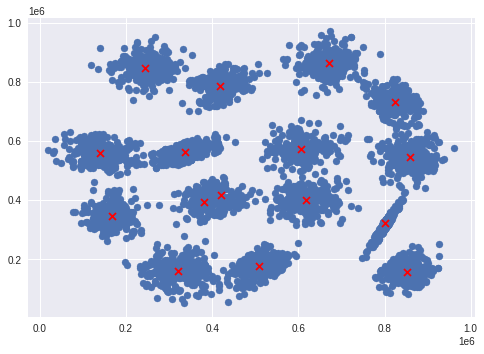

In [134]:
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

## Conclusion

This tutorial discusses Big Data via PySpark, a Python package for spark programming. In this tutorial, I explained SparkContext, using map and filter methods with Lambda functions in Python, creating rdd from object and external file, transformations and actions on rdd and pair rdd, SparkSession, creating PySpark Dataframe from rdd and external file, using sql queries with Dataframes by using Spark SQL module and finally, machine learning with PySpark MLlib library.  

本教程通过 PySpark（一种用于 Spark 编程的 Python 包）介绍了大数据。我通过在 Python 中将 map 和 filter 方法与 Lambda 函数配合使用介绍了 SparkContext。我们还通过对象和外部文件创建 RDD，在 RDD 和 pair RDD 上进行转换和执行，了解了 SparkSession，以及通过 RDD 和外部文件创建 PySpark DataFrames。然后，我利用 Spark SQL 模块，将 sql 查询与 DataFrame 配套使用。最后，我使用 PySpark MLlib 库进行了机器学习。